# PUNTO 4 - JUAN CAMILO VERGARA

Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

-	El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico: - TV: Gasto en publicidad en televisión. - Radio: Gasto en publicidad en radio. - Newspaper: Gasto en publicidad en periódicos. - Sales: Número de unidades vendidas (en miles)

Hay que estandarizar los valores

-	Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

-	Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

-	Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

-	Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del 95 % para la predicción?


In [2]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## Librería funciones estadísticas

In [24]:
ruta_archivo = "datasets/publicidad.csv"
data_publicidad = pd.read_csv(ruta_archivo)
data_publicidad = data_publicidad.rename(columns={"Unnamed: 0": "Índice"})
data_publicidad = data_publicidad.drop(columns={"Índice"})
data_publicidad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
data_publicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
def tabla_descriptivas(columnas: list):
  tabla_descriptivas=pd.DataFrame(columnas.describe())
  tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
  tabla_descriptivas.loc['skew']=skew(columnas)
  tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
  tabla_descriptivas.loc['mediana']=columnas.median()

  # Fix the indentation for the loop
  for columna in columnas:
      tabla_descriptivas.loc['coef. variation', columna] = data_publicidad[columna].std() / data_publicidad[columna].mean()
      tabla_descriptivas.loc['skew', columna] = skew(data_publicidad[columna])
      tabla_descriptivas.loc['kurtosis', columna] = kurtosis(data_publicidad[columna])
      tabla_descriptivas.loc['mediana']=columnas.median()
  return tabla_descriptivas

tabla_descriptivas(data_publicidad[['TV', 'Radio', 'Newspaper', 'Sales']])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
coef. variation,0.583874,0.638188,0.712791,0.372077
skew,-0.069328,0.093467,0.887996,0.404508


Se puede observar la siguiente información:
- La media y la mediana no son muy diferentes, eso hace pensar que los datos no se encuentran tan sesgados
- La kurtosis de todos los valores no es tan grande, lo que puede significar una baja dispersión de los datos. Sin embargo para TV, Radio y Ventas se observa una kurtosis negativa que indica que la distribución de los datos tiene a estar más aplanada, en cambio en el Periódico se muestra una distribución más alargada en su centro.
- El skew mide el grado de asimetría de los datos. En este caso para el Radio, Periódico y ventas se presenta unos valores positivos que indican distribución sesgada hacia la izquierda y el valor negativo de TV indica lo contrario, un sesgo hacia la derecha

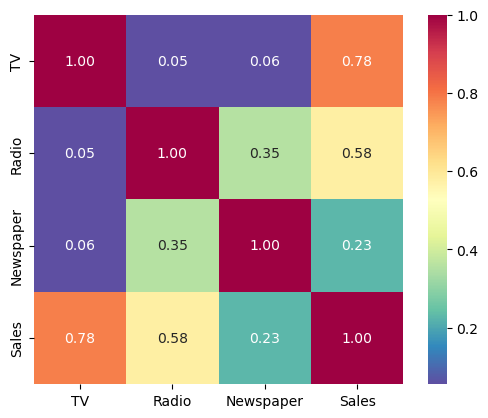

In [28]:
corrmat = data_publicidad.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_publicidad.columns, 
                 xticklabels=data_publicidad.columns, 
                 cmap="Spectral_r")
plt.show()